In [14]:
%env KERAS_BACKEND=plaidml.keras.backend
%env PLAIDML_NATIVE_PATH=/usr/local/lib/libplaidml.dylib
%env RUNFILES_DIR=/usr/local/share/plaidml
%env PLAIDML_USE_STRIPE=1
%load_ext tensorboard

env: KERAS_BACKEND=plaidml.keras.backend
env: PLAIDML_NATIVE_PATH=/usr/local/lib/libplaidml.dylib
env: RUNFILES_DIR=/usr/local/share/plaidml
env: PLAIDML_USE_STRIPE=1
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [15]:
pip install keras==2.2.4 plaidml tensorflow plaidml-keras

Note: you may need to restart the kernel to use updated packages.


In [28]:
import pandas as pd
import numpy as np
import keras
import datetime
import matplotlib.pyplot as plt



In [29]:
file_url = "input_data.csv"
dataframe = pd.read_csv(file_url, dtype= {
'index': int,
'term' : str, 
'installment' : np.float32,
'loan_amnt' : np.float32,
'emp_title' : 'str', 
'purpose' : 'str', 
'title' : 'str', 
'dti' : np.float32,
'collections_12_mths_ex_med' : np.float32,
'application_type' : 'str', 
'tot_coll_amt' : np.float32,
'tot_cur_bal' : np.float32,
'open_acc_6m' : np.float32,
'open_act_il' : np.float32,
'open_il_12m' : np.float32,
'open_il_24m' : np.float32,
'mths_since_rcnt_il' : np.float32,
'total_bal_il' : np.float32,
'open_rv_12m' : np.float32,
'open_rv_24m' : np.float32,
'max_bal_bc' : np.float32,
'all_util' : np.float32,
'inq_fi' : np.float32,
'total_cu_tl' : np.float32,
'inq_last_12m' : np.float32,
'avg_cur_bal' : np.float32,
'chargeoff_within_12_mths' : np.float32,
'mo_sin_old_rev_tl_op' : np.float32,
'mo_sin_rcnt_rev_tl_op' : np.float32,
'mo_sin_rcnt_tl' : np.float32,
'num_accts_ever_120_pd' : 'str',
'num_actv_bc_tl' : np.float32,
'num_actv_rev_tl' : np.float32,
'num_bc_sats' : np.float32,
'num_bc_tl' : np.float32,
'num_il_tl' : np.float32,
'num_op_rev_tl' : np.float32,
'num_rev_accts' : np.float32,
'num_rev_tl_bal_gt_0' : np.float32,
'num_sats' : np.float32,
'num_tl_120dpd_2m' : np.float32,
'num_tl_30dpd' : np.float32,
'num_tl_90g_dpd_24m' : np.float32,
'num_tl_op_past_12m' : np.float32,
'pct_tl_nvr_dlq' : np.float32,
'pub_rec_bankruptcies' : np.float32,
'tax_liens' : np.float32,
'tot_hi_cred_lim' : np.float32,
'total_il_high_credit_limit' : np.float32,
'disbursement_method' : 'str', 
'is_risky' : np.int32,
    })
dataframe.set_index("index", inplace=True)
dataframe.dropna(inplace=True)
dataframe.reset_index(drop=True,inplace=True)

In [18]:
to_int_cols = ['chargeoff_within_12_mths', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'pub_rec_bankruptcies']
dataframe[to_int_cols] = dataframe[to_int_cols].astype(np.int32)

In [19]:
dataframe.shape

(1172538, 50)

In [20]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1172538 entries, 0 to 1172537
Data columns (total 50 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   loan_amnt                   1172538 non-null  float32
 1   term                        1172538 non-null  object 
 2   installment                 1172538 non-null  float32
 3   emp_title                   1172538 non-null  object 
 4   purpose                     1172538 non-null  object 
 5   title                       1172538 non-null  object 
 6   dti                         1172538 non-null  float32
 7   collections_12_mths_ex_med  1172538 non-null  float32
 8   application_type            1172538 non-null  object 
 9   tot_coll_amt                1172538 non-null  float32
 10  tot_cur_bal                 1172538 non-null  float32
 11  open_acc_6m                 1172538 non-null  float32
 12  open_act_il                 1172538 non-null  float32
 1

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
LE = LabelEncoder()
train_features = [
#     "chargeoff_within_12_mths",
     "num_tl_120dpd_2m",
     "loan_amnt",
#     "num_tl_30dpd",
#     "pub_rec_bankruptcies",
#     "all_util",
     "avg_cur_bal",
#     "collections_12_mths_ex_med",
     "dti",
#     "inq_fi",
#     "inq_last_12m",
     "installment",
#     "max_bal_bc",
#     "mo_sin_old_rev_tl_op",
#     "mo_sin_rcnt_rev_tl_op",
#     "mo_sin_rcnt_tl",
#     "mths_since_rcnt_il",
#     "num_accts_ever_120_pd",
#     "num_actv_bc_tl",
#     "num_actv_rev_tl",
#     "num_bc_sats",
#     "num_bc_tl",
#     "num_il_tl",
#     "num_op_rev_tl",
#     "num_rev_accts",
#     "num_rev_tl_bal_gt_0",
#     "num_sats",
#     "num_tl_90g_dpd_24m",
#     "num_tl_op_past_12m",
#     "open_acc_6m",
#     "open_act_il",
#     "open_il_12m",
#     "open_il_24m",
#     "open_rv_12m",
#     "open_rv_24m",
#     "pct_tl_nvr_dlq",
#     "tax_liens",
#     "tot_coll_amt",
#     "tot_cur_bal",
#     "tot_hi_cred_lim",
#     "total_bal_il",
#     "total_cu_tl",
#     "total_il_high_credit_limit",
    "application_type",
    "purpose",
    "term"
]

X = dataframe[train_features].copy()

X['application_type'] = LE.fit_transform(X['application_type'])
X['purpose'] = LE.fit_transform(X['purpose'])
X['term'] = LE.fit_transform(X['term'])

y = to_categorical(dataframe["is_risky"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
#6. Definir la arquitectura del modelo

from keras.models import Sequential
from keras.layers import Dense, Dropout

# definir el modelo
model = Sequential()
model.add(Dense(100, input_shape=(X.shape[1],), activation="relu"))
model.add(Dense(65, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

# resumen del modelo
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               900       
_________________________________________________________________
dense_5 (Dense)              (None, 65)                6565      
_________________________________________________________________
dropout_2 (Dropout)          (None, 65)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 132       
Total params: 7,597
Trainable params: 7,597
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])

In [24]:
keras.utils.plot_model(model,to_file="model_plaidml1.png", show_shapes=True, rankdir="LR")

In [25]:
# 8. Calcular la precisión del clasificador en el conjunto de pruebas (antes de entrenamiento)
# evaluar la precisión en el conjunto de prueba
score = model.evaluate(X_test, y_test, verbose=2)
accuracy = 100*score[1]

# mostrar la precisión del conjunto de prueba
print('Precisión en el conjunto de prueba: %.4f%%' % accuracy)

Precisión en el conjunto de prueba: 50.0000%


In [26]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='ia-plaidml1.model.best.hdf5', verbose=1, save_best_only=True)
history = model.fit(X_train,y_train, epochs=50,batch_size=30,validation_split=0.2, callbacks=[checkpointer], verbose=1, shuffle=True)

Train on 750424 samples, validate on 187606 samples
Epoch 1/50
750424/750424 [==============================] - 203s 271us/step - loss: 7.9697 - acc: 0.5003 - val_loss: 7.9712 - val_acc: 0.5000

Epoch 00001: val_loss improved from inf to 7.97119, saving model to ia-plaidml1.model.best.hdf5
Epoch 2/50
750424/750424 [==============================] - 188s 250us/step - loss: 7.9708 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000

Epoch 00002: val_loss did not improve from 7.97119
Epoch 3/50
750424/750424 [==============================] - 180s 240us/step - loss: 7.9708 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000

Epoch 00003: val_loss did not improve from 7.97119
Epoch 4/50
750424/750424 [==============================] - 179s 239us/step - loss: 7.9709 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000

Epoch 00004: val_loss did not improve from 7.97119
Epoch 5/50
750424/750424 [==============================] - 180s 240us/step - loss: 7.9708 - acc: 0.5000 - val_loss: 7.9712 - v

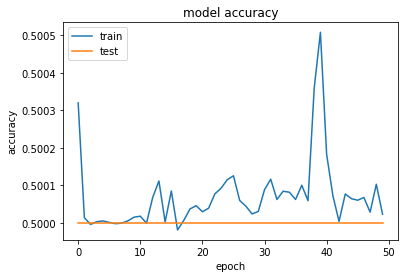

In [30]:

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

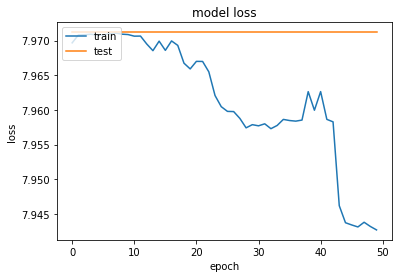

In [31]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
# 10. Cargar el modelo con la mejor precisión de clasificación en el conjunto de validación

# Cargar los pesos (parámetros) que produjeron la mejor precisión en validación
model.load_weights('ia-plaidml1.model.best.hdf5')

In [33]:
# 11. Calcular la precisión en clasificación en el conjunto de prueba

score = model.evaluate(X_test, y_test, verbose=1)
accuracy = 100*score[1]

234508/234508 [==============================] - 20s 86us/step


In [34]:
# mostrar la precisión en prubea
print('Precisión durante la prueba: %.4f%%' % accuracy)

Precisión durante la prueba: 50.0000%


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
LE = LabelEncoder()
train_features = [
#     "chargeoff_within_12_mths",
     "num_tl_120dpd_2m",
     "loan_amnt",
#     "num_tl_30dpd",
#     "pub_rec_bankruptcies",
#     "all_util",
     "avg_cur_bal",
#     "collections_12_mths_ex_med",
     "dti",
#     "inq_fi",
#     "inq_last_12m",
     "installment",
     "max_bal_bc",
#     "mo_sin_old_rev_tl_op",
#     "mo_sin_rcnt_rev_tl_op",
#     "mo_sin_rcnt_tl",
#     "mths_since_rcnt_il",
#     "num_accts_ever_120_pd",
#     "num_actv_bc_tl",
#     "num_actv_rev_tl",
#     "num_bc_sats",
#     "num_bc_tl",
#     "num_il_tl",
#     "num_op_rev_tl",
#     "num_rev_accts",
#     "num_rev_tl_bal_gt_0",
#     "num_sats",
#     "num_tl_90g_dpd_24m",
#     "num_tl_op_past_12m",
#     "open_acc_6m",
#     "open_act_il",
#     "open_il_12m",
#     "open_il_24m",
#     "open_rv_12m",
#     "open_rv_24m",
#     "pct_tl_nvr_dlq",
#     "tax_liens",
#     "tot_coll_amt",
     "tot_cur_bal",
#     "tot_hi_cred_lim",
#     "total_bal_il",
#     "total_cu_tl",
#     "total_il_high_credit_limit",
    "application_type",
    "purpose",
    "term"
]

X = dataframe[train_features].copy()

X['application_type'] = LE.fit_transform(X['application_type'])
X['purpose'] = LE.fit_transform(X['purpose'])
X['term'] = LE.fit_transform(X['term'])

y = to_categorical(dataframe["is_risky"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
#6. Definir la arquitectura del modelo

from keras.models import Sequential
from keras.layers import Dense, Dropout

# definir el modelo
model = Sequential()
model.add(Dense(100, input_shape=(X.shape[1],), activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(65, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

# resumen del modelo
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               1100      
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 65)                6565      
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 132       
Total params: 7,797
Trainable params: 7,797
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])

In [38]:
keras.utils.plot_model(model,to_file="model_plaidml21.png", show_shapes=True, rankdir="LR")

In [39]:
# 8. Calcular la precisión del clasificador en el conjunto de pruebas (antes de entrenamiento)
# evaluar la precisión en el conjunto de prueba
score = model.evaluate(X_test, y_test, verbose=2)
accuracy = 100*score[1]

# mostrar la precisión del conjunto de prueba
print('Precisión en el conjunto de prueba: %.4f%%' % accuracy)

Precisión en el conjunto de prueba: 51.6434%


In [40]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='ia-plaidml21.model.best.hdf5', verbose=1, save_best_only=True)
history = model.fit(X_train,y_train, epochs=30,batch_size=30,validation_split=0.2, callbacks=[checkpointer], verbose=1, shuffle=True)

Train on 750424 samples, validate on 187606 samples
Epoch 1/30
750424/750424 [==============================] - 142s 189us/step - loss: 8.2905 - acc: 0.4828 - val_loss: 8.2714 - val_acc: 0.4840

Epoch 00001: val_loss improved from inf to 8.27137, saving model to ia-plaidml21.model.best.hdf5
Epoch 2/30
750424/750424 [==============================] - 146s 194us/step - loss: 8.2900 - acc: 0.4828 - val_loss: 8.2714 - val_acc: 0.4840

Epoch 00002: val_loss did not improve from 8.27137
Epoch 3/30
750424/750424 [==============================] - 145s 193us/step - loss: 8.2900 - acc: 0.4828 - val_loss: 8.2714 - val_acc: 0.4840

Epoch 00003: val_loss did not improve from 8.27137
Epoch 4/30
750424/750424 [==============================] - 143s 191us/step - loss: 8.2900 - acc: 0.4829 - val_loss: 8.2714 - val_acc: 0.4840

Epoch 00004: val_loss did not improve from 8.27137
Epoch 5/30
750424/750424 [==============================] - 140s 186us/step - loss: 8.2901 - acc: 0.4828 - val_loss: 8.2714 - 

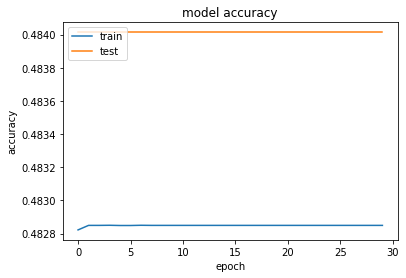

In [41]:

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

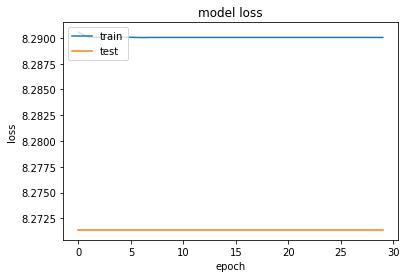

In [42]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [43]:
# 10. Cargar el modelo con la mejor precisión de clasificación en el conjunto de validación

# Cargar los pesos (parámetros) que produjeron la mejor precisión en validación
model.load_weights('ia-plaidml21.model.best.hdf5')

In [44]:
# 11. Calcular la precisión en clasificación en el conjunto de prueba

score = model.evaluate(X_test, y_test, verbose=1)
accuracy = 100*score[1]

234508/234508 [==============================] - 19s 83us/step


In [45]:
# mostrar la precisión en prubea
print('Precisión durante la prueba: %.4f%%' % accuracy)

Precisión durante la prueba: 48.3557%


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
LE = LabelEncoder()
train_features = [
#     "chargeoff_within_12_mths",
     "num_tl_120dpd_2m",
     "loan_amnt",
     "num_tl_30dpd",
#     "pub_rec_bankruptcies",
#     "all_util",
     "avg_cur_bal",
#     "collections_12_mths_ex_med",
     "dti",
#     "inq_fi",
#     "inq_last_12m",
     "installment",
#     "max_bal_bc",
#     "mo_sin_old_rev_tl_op",
#     "mo_sin_rcnt_rev_tl_op",
#     "mo_sin_rcnt_tl",
#     "mths_since_rcnt_il",
#     "num_accts_ever_120_pd",
#     "num_actv_bc_tl",
#     "num_actv_rev_tl",
#     "num_bc_sats",
#     "num_bc_tl",
     "num_il_tl",
#     "num_op_rev_tl",
#     "num_rev_accts",
#     "num_rev_tl_bal_gt_0",
     "num_sats",
#     "num_tl_90g_dpd_24m",
#     "num_tl_op_past_12m",
#     "open_acc_6m",
#     "open_act_il",
#     "open_il_12m",
#     "open_il_24m",
#     "open_rv_12m",
#     "open_rv_24m",
#     "pct_tl_nvr_dlq",
#     "tax_liens",
#     "tot_coll_amt",
#     "tot_cur_bal",
#     "tot_hi_cred_lim",
#     "total_bal_il",
#     "total_cu_tl",
#     "total_il_high_credit_limit",
    "application_type",
    "purpose",
    "term"
]

X = dataframe[train_features].copy()

X['application_type'] = LE.fit_transform(X['application_type'])
X['purpose'] = LE.fit_transform(X['purpose'])
X['term'] = LE.fit_transform(X['term'])

y = to_categorical(dataframe["is_risky"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [47]:
#6. Definir la arquitectura del modelo

from keras.models import Sequential
from keras.layers import Dense, Dropout

# definir el modelo
model = Sequential()
model.add(Dense(100, input_shape=(X.shape[1],), activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(65, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

# resumen del modelo
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 100)               1200      
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 65)                6565      
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 132       
Total params: 7,897
Trainable params: 7,897
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])

In [49]:
keras.utils.plot_model(model,to_file="model_plaidml31.png", show_shapes=True, rankdir="LR")

In [50]:
# 8. Calcular la precisión del clasificador en el conjunto de pruebas (antes de entrenamiento)
# evaluar la precisión en el conjunto de prueba
score = model.evaluate(X_test, y_test, verbose=2)
accuracy = 100*score[1]

# mostrar la precisión del conjunto de prueba
print('Precisión en el conjunto de prueba: %.4f%%' % accuracy)

Precisión en el conjunto de prueba: 51.8166%


In [ ]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='ia-plaidml31.model.best.hdf5', verbose=1, save_best_only=True)
history = model.fit(X_train,y_train, epochs=50,batch_size=30,validation_split=0.2, callbacks=[checkpointer], verbose=1, shuffle=True)

Train on 750424 samples, validate on 187606 samples
Epoch 1/50
750424/750424 [==============================] - 136s 181us/step - loss: 8.0902 - acc: 0.4972 - val_loss: 8.0591 - val_acc: 0.5000

Epoch 00001: val_loss improved from inf to 8.05905, saving model to ia-plaidml31.model.best.hdf5
Epoch 2/50
750424/750424 [==============================] - 136s 182us/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0591 - val_acc: 0.5000

Epoch 00002: val_loss did not improve from 8.05905
Epoch 3/50
750424/750424 [==============================] - 150s 200us/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0591 - val_acc: 0.5000

Epoch 00003: val_loss did not improve from 8.05905
Epoch 4/50
750424/750424 [==============================] - 148s 197us/step - loss: 8.0591 - acc: 0.5000 - val_loss: 8.0591 - val_acc: 0.5000

Epoch 00004: val_loss did not improve from 8.05905
Epoch 5/50
750424/750424 [==============================] - 145s 194us/step - loss: 8.0591 - acc: 0.5000 - val_loss: 8.0591 - 

In [ ]:

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# 10. Cargar el modelo con la mejor precisión de clasificación en el conjunto de validación

# Cargar los pesos (parámetros) que produjeron la mejor precisión en validación
model.load_weights('ia-plaidml31.model.best.hdf5')

In [ ]:
# 11. Calcular la precisión en clasificación en el conjunto de prueba

score = model.evaluate(X_test, y_test, verbose=1)
accuracy = 100*score[1]

In [ ]:
# mostrar la precisión en prubea
print('Precisión durante la prueba: %.4f%%' % accuracy)